In [46]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

num_workers = 0
batch_size = 20

transform = transforms.ToTensor()

# 训练集
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# 数据导入
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

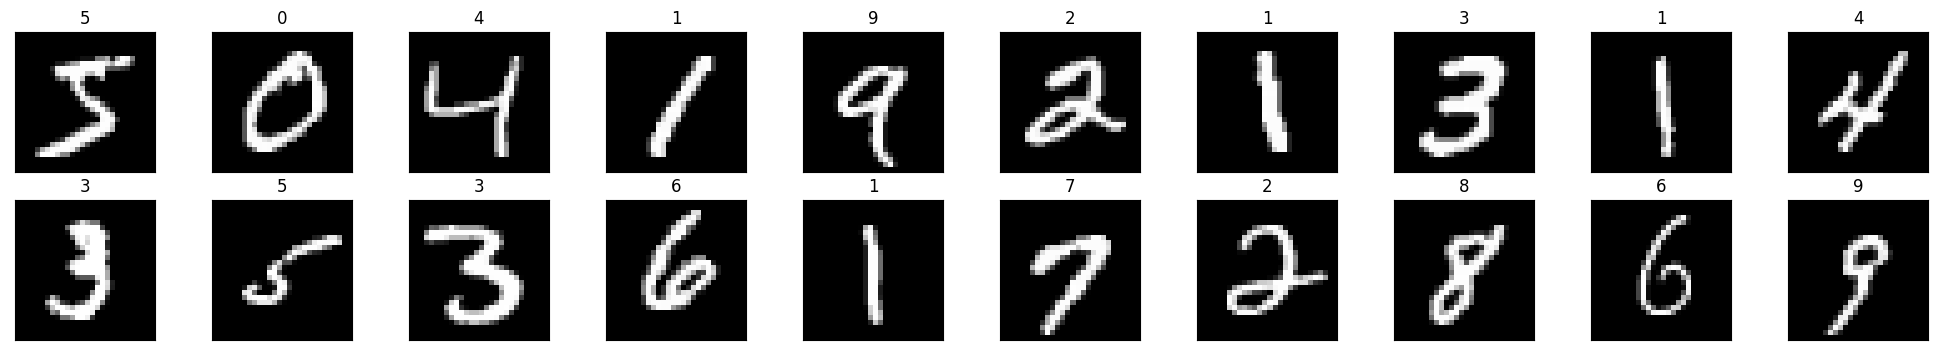

In [47]:
import matplotlib.pyplot as plt
    
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [38]:
# 5
img = np.squeeze(images[0])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [39]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        # 避免过拟合
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        # 隐藏层 relu激活函数
        x = F.relu(self.fc1(x))
        return x

model = Net()
# 损失函数
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [40]:
n_epochs = 30
model.train()

for epoch in range(n_epochs):
    # training loss
    train_loss = 0.0

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.807362
Epoch: 2 	Training Loss: 0.412448
Epoch: 3 	Training Loss: 0.370587
Epoch: 4 	Training Loss: 0.349352
Epoch: 5 	Training Loss: 0.335811
Epoch: 6 	Training Loss: 0.326168
Epoch: 7 	Training Loss: 0.318832
Epoch: 8 	Training Loss: 0.313000
Epoch: 9 	Training Loss: 0.308212
Epoch: 10 	Training Loss: 0.304187
Epoch: 11 	Training Loss: 0.300736
Epoch: 12 	Training Loss: 0.297734
Epoch: 13 	Training Loss: 0.295087
Epoch: 14 	Training Loss: 0.292730
Epoch: 15 	Training Loss: 0.290611
Epoch: 16 	Training Loss: 0.288692
Epoch: 17 	Training Loss: 0.286942
Epoch: 18 	Training Loss: 0.285336
Epoch: 19 	Training Loss: 0.283855
Epoch: 20 	Training Loss: 0.282483
Epoch: 21 	Training Loss: 0.281206
Epoch: 22 	Training Loss: 0.280014
Epoch: 23 	Training Loss: 0.278898
Epoch: 24 	Training Loss: 0.277848
Epoch: 25 	Training Loss: 0.276859
Epoch: 26 	Training Loss: 0.275924
Epoch: 27 	Training Loss: 0.275038
Epoch: 28 	Training Loss: 0.274198
Epoch: 29 	Training Loss: 0.2

In [41]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.273904

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1109/1135)
Test Accuracy of     2: 88% (917/1032)
Test Accuracy of     3: 90% (915/1010)
Test Accuracy of     4: 92% (911/982)
Test Accuracy of     5: 87% (780/892)
Test Accuracy of     6: 94% (909/958)
Test Accuracy of     7: 92% (947/1028)
Test Accuracy of     8: 88% (863/974)
Test Accuracy of     9: 90% (914/1009)

Test Accuracy (Overall): 92% (9227/10000)


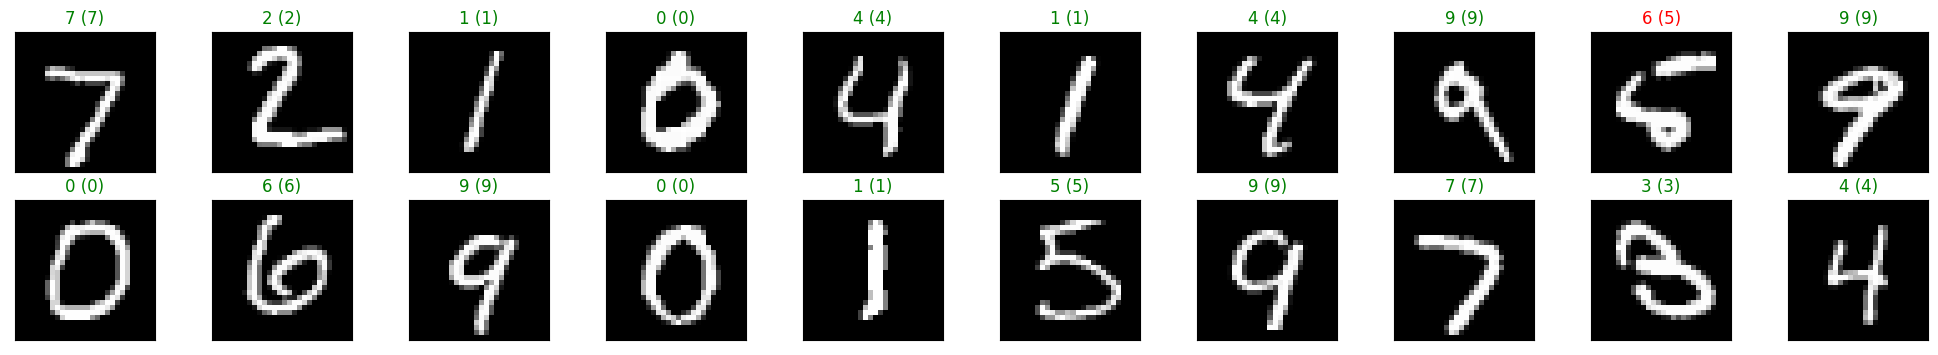

In [45]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))